# Investigating Life Expectancy Patterns, Outliers and Correlations

# Essencial Libraries

In [167]:
# importing all the required libraries for this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Exploration

* DataFrame() function initialises dataframe object in pandas and allows to create a table like structure.

In [168]:
# Readin the Life Expectancy dataset which was downloaded from the kaggle website
life_expectancy_data = pd.read_csv("/content/Life Expectancy Data.xls")

In [169]:
# Examining first five records from the loaded dataset
pd.set_option('display.max_columns', None)
life_expectancy_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [170]:
# Checking the shape of the dataset
print(f"Shape of the Life Expectancy dataset is : {life_expectancy_data.shape}")

Shape of the Life Expectancy dataset is : (2938, 22)


* This life expectancy dataset contains total 2938 records and 22 columns.

In [171]:
# Examining the column names
print(f"Column Names : \n{life_expectancy_data.columns}")

Column Names : 
Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


* Here we can see that, some blank spaces are present in between the column names. those shoud be removed.

In [172]:
# Removing leading and trailing whitespaces from column names
life_expectancy_data.columns = life_expectancy_data.columns.str.strip().str.lower()

In [173]:
# defining dictionary for column renaming
rename_col_dict = {
    "life expectancy" : "life_expectancy",
    "adult mortality" : "adult_mortality",
    "infant deaths" : "infant_deaths",
    "percentage expenditure" : "percentage_expenditure",
    "hepatitis b": "hepatitis_b",
    "under-five deaths" : "under_five_deaths",
    "total expenditure" : "total_expenditure",
    "thinness  1-19 years" : "thinness_1-19_years",
    "thinness 5-9 years" : "thinness_5-9_years",
    "income composition of resources" : "income_composition_of_resources"
}

In [174]:
# renaming the columns
life_expectancy_data.rename(columns=rename_col_dict, inplace=True)

In [175]:
# Examining the column names after renaming
print(f"Column Names :\n{life_expectancy_data.columns}")

Column Names :
Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')


* Now columns names are in proper format.

# Handling Null Values - Median

In [176]:
# Identifying the null value count
print(f"\t---Null Value Count---\t\n{life_expectancy_data.isna().sum()}")

	---Null Value Count---	
country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under_five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness_1-19_years                 34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64


* Only nemirical columns have the null values.
* Need to fill those with mean or median value of the respective column.

In [177]:
# Calculating total null value count
print(f"Total Null Value Count : {life_expectancy_data.isna().sum().sum()}")

Total Null Value Count : 2563


In [178]:
# seperating columns with missing values
null_value_cols = life_expectancy_data.isna().sum()
print("Columns with missing values:")
print(null_value_cols[null_value_cols > 0])

Columns with missing values:
life_expectancy                     10
adult_mortality                     10
alcohol                            194
hepatitis_b                        553
bmi                                 34
polio                               19
total_expenditure                  226
diphtheria                          19
gdp                                448
population                         652
thinness_1-19_years                 34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64


In [179]:
# Identifying numerical columns from the Life Expectancy dataset
num_cols = life_expectancy_data.select_dtypes(include=['float64', 'int64']).columns

# Filling null values for numerical columns with the median
life_expectancy_data[num_cols] = life_expectancy_data[num_cols].fillna(life_expectancy_data[num_cols].median())

In [180]:
life_expectancy_data.isna().sum().sum()

0

* Successfully null values has been filled with the median value of the columns.

In [181]:
life_expectancy_data.duplicated().sum()

0

* This dataset dont have any duplicate records.

# Handling Outliers - Capping

In [182]:
# Defining function to detect outliers using IQR method
def detect_outliers_using_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Finding outliers
    outliers = life_expectancy_data[(life_expectancy_data[col] < lower_bound) | (life_expectancy_data[col] > upper_bound)]
    return outliers

In [183]:
# printing outliers present in each numerical column
for col in num_cols:
    outliers = detect_outliers_using_iqr(life_expectancy_data, col)
    print(f"- Outliers in {col}: {len(outliers)}")

- Outliers in year: 0
- Outliers in life_expectancy: 17
- Outliers in adult_mortality: 86
- Outliers in infant_deaths: 315
- Outliers in alcohol: 3
- Outliers in percentage_expenditure: 389
- Outliers in hepatitis_b: 322
- Outliers in measles: 542
- Outliers in bmi: 0
- Outliers in under_five_deaths: 394
- Outliers in polio: 279
- Outliers in total_expenditure: 51
- Outliers in diphtheria: 298
- Outliers in hiv/aids: 542
- Outliers in gdp: 445
- Outliers in population: 452
- Outliers in thinness_1-19_years: 100
- Outliers in thinness_5-9_years: 99
- Outliers in income_composition_of_resources: 130
- Outliers in schooling: 77


In [184]:
# defining function to cap outliers using IQR method
def cap_outliers_using_iqr(data, col):
    # Calculating Q1, Q3 and IQR
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # lower and upper bounds for capping
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping values to the bounds
    data[col] = np.clip(data[col], lower_bound, upper_bound)
    return data

In [185]:
# picking only numeric columns for outlier capping
numeric_columns = life_expectancy_data.select_dtypes(include=[np.number]).columns

# Applying capping - for all numeric columns with outliers
for col in numeric_columns:
    life_expectancy_data = cap_outliers_using_iqr(life_expectancy_data, col)

In [186]:
# printing outliers present in each numerical column
for col in num_cols:
    outliers = detect_outliers_using_iqr(life_expectancy_data, col)
    print(f"- Outliers in {col}: {len(outliers)}")

- Outliers in year: 0
- Outliers in life_expectancy: 0
- Outliers in adult_mortality: 0
- Outliers in infant_deaths: 0
- Outliers in alcohol: 0
- Outliers in percentage_expenditure: 0
- Outliers in hepatitis_b: 0
- Outliers in measles: 0
- Outliers in bmi: 0
- Outliers in under_five_deaths: 0
- Outliers in polio: 0
- Outliers in total_expenditure: 0
- Outliers in diphtheria: 0
- Outliers in hiv/aids: 0
- Outliers in gdp: 0
- Outliers in population: 0
- Outliers in thinness_1-19_years: 0
- Outliers in thinness_5-9_years: 0
- Outliers in income_composition_of_resources: 0
- Outliers in schooling: 0


* describe() function summarises numerical columns by displaying statistics such as mean, median, min, max and quartiles. By analysing these values useful insights can be retrieved.

In [187]:
life_expectancy_data.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.244588,161.953370,13.635126,4.546310,284.045797,87.008850,233.745660,38.381178,17.965963,85.356535,5.890456,85.301906,0.536215,3443.019953,3.173255e+06,4.687474,4.705956,0.634903,12.060824
std,4.613841,9.481081,115.488489,19.108928,3.920116,389.455566,12.308952,353.612509,19.935375,25.194515,15.809647,2.289750,15.790731,0.693393,3777.901722,3.837555e+06,3.933064,3.976248,0.191836,3.101263
min,2000.000000,44.600000,1.000000,0.000000,0.010000,0.000000,61.000000,0.000000,1.000000,0.000000,49.500000,0.370000,49.500000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.102625,4.600000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,456.500000,55.000000,16.836250,1096.807347,99.000000,900.625000,87.300000,70.000000,99.000000,11.770000,99.000000,1.850000,11077.782482,1.083255e+07,15.350000,15.600000,0.948000,19.800000


* Life expectancy varies significantly across countries from  low of 44.6 to a high of 89 which clearly highlighting disparities in health outcomes.

* Higher infant deaths up to 55 correlate with lower life expectancy while health expenditure differences (0 to 1096) suggest varying national priorities in health

* GDP per capita spans from as low as 1.68 to over 11000 which suggests economic development as important factor influencing life expectancy outcomes

# Data Visualisation

In [188]:
life_expectancy_data.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,55,0.01,71.279624,65.0,900.625,19.1,70,49.5,8.16,65.0,0.1,584.259210,10832552.25,15.35,15.6,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,55,0.01,73.523582,62.0,492.000,18.6,70,58.0,8.18,62.0,0.1,612.696514,327582.00,15.35,15.6,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,55,0.01,73.219243,64.0,430.000,18.1,70,62.0,8.13,64.0,0.1,631.744976,10832552.25,15.35,15.6,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,55,0.01,78.184215,67.0,900.625,17.6,70,67.0,8.52,67.0,0.1,669.959000,3696958.00,15.35,15.6,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,55,0.01,7.097109,68.0,900.625,17.2,70,68.0,7.87,68.0,0.1,63.537231,2978599.00,15.35,15.6,0.454,9.5


## Graph I - Histogram

In [189]:
# defining the function to visuvalise distribution of life expectancy column
def life_expectancy_histogram(data, col, bins):
    """
    It plots a histogram for life expectancy data

    Parameters:
    - data: dataframe containing the life expectancy data
    - col: column name to plot the histogram for
    - bins: number of bins for the histogram
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], bins=bins, color='#519872', edgecolor='#4B5D67')
    plt.title(f'Graph I - Distribution of Life Expectancy', fontsize=15)
    plt.xlabel(col.capitalize(), fontsize=13)
    plt.ylabel('Frequency', fontsize=13)
    plt.tight_layout()
    plt.show()

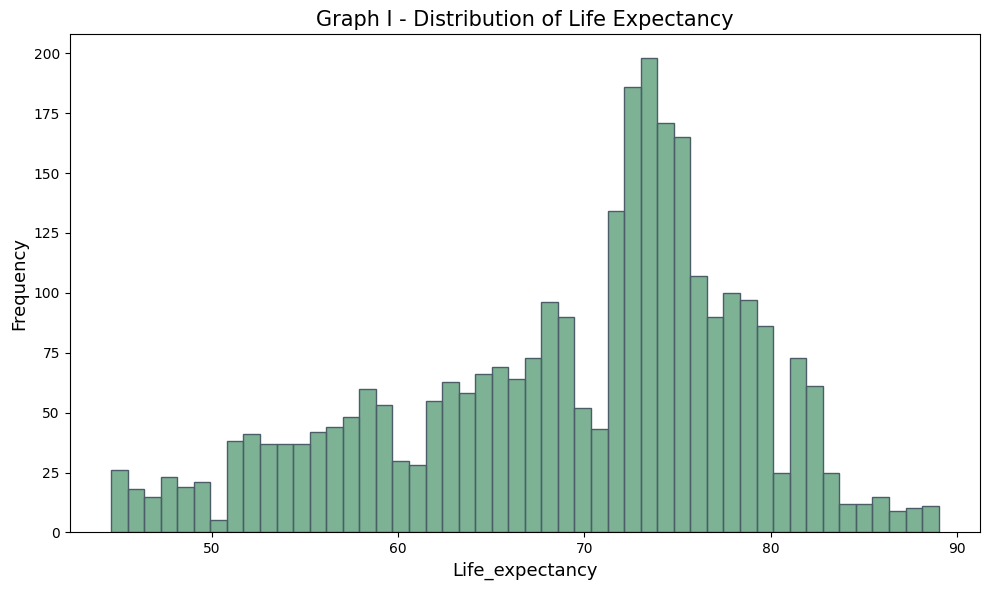

In [190]:
# calling function which is defined for visuvalising distribution of life expectancy
life_expectancy_histogram(life_expectancy_data, col='life_expectancy', bins=50)

* The abobe histogram clearly indicated that, highest frequency occurs around a life expectancy of 75 years. Which suggest that most countries have an average life expectancy close to 75 years

* Vlues mostly range from 45 to 85 years with fewer countries having very low (below 50) or very high (above 80) life expectancy. It indicates some diversity in life expectancy across different countries.

## Graph II - Line Graph

In [191]:
# defining the function to visuvalise the highest average life expectancy
def top_countries_life_expectancy(data, top_n):
    """
    It plots top N countries with the highest average life expectancy

    Parameters:
    - dataset: dataframe containing the life expectancy data
    - top_n: number of top countries to plot
    """
    # Grouping data by country and calculating average life expectancy for each country
    country_life_expectancy = data.groupby('country')['life_expectancy'].mean().sort_values(ascending=False)

    # Selecting only top N countries with the highest average life expectancy
    top_countries = country_life_expectancy.head(top_n)

    # Plotting data as a line graph
    plt.figure(figsize=(10, 8))
    plt.plot(top_countries.index, top_countries.values, marker='o', color='#1E5F74', linestyle='-', linewidth=3, markersize=8, markerfacecolor='#519872')
    plt.title(f'Graph II - Top {top_n} Countries by Average Life Expectancy', fontsize=15)
    plt.xlabel('Country Name', fontsize=13)
    plt.ylabel('Average Life Expectancy', fontsize=13)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

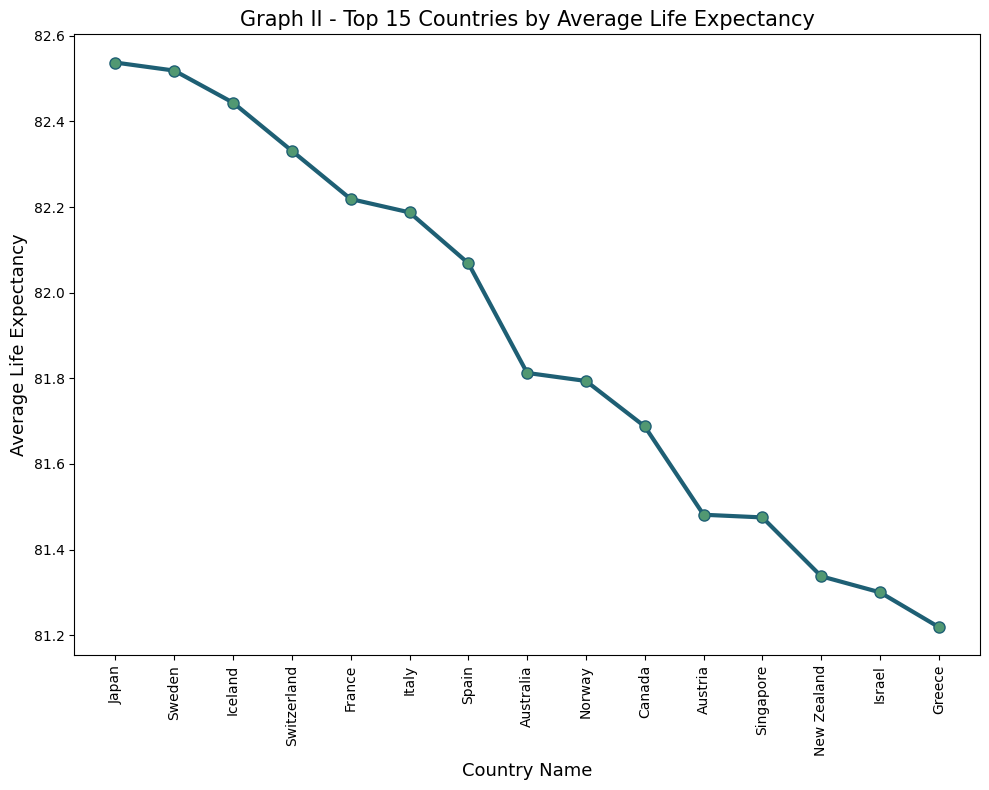

In [192]:
# calling the function defined for visuvalising highest average life expectancy
top_countries_life_expectancy(life_expectancy_data, top_n=15)

* Japan has the highest average life expectancy among the listed countries slightly above 82.5 years. It clearly indicates that tis country is one of the leading countries in terms of life expectancy.

* Differences in life expectancy among these top 15 countries are relatively small with all of them averaging between 81.2 and 82.6 years. It represents that these countries have similar high standards of living and healthcare.

## Graph III - Heatmap

* corr() function calculates correlation between multiple numerical columns and shows strength and direction of linear relationships

In [193]:
# defining the function to visuvalise correlation matrix
def correlation_heatmap_for_num_cols(data):
    """
    It plots  heatmap of the correlation matrix only for numerical columns

    Parameters:
    data : dataframe containing the Life Expectancy data
    """
    # Selecting only numerical columns
    num_data = data.select_dtypes(include=['float64', 'int64'])

    # Calculating correlation matrix and making a heatmap
    correlation_matrix = num_data.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap=sns.light_palette("#519872", as_cmap=True),
                linewidths=0.8, linecolor='white', annot_kws={"size": 7}, cbar_kws={'orientation': 'vertical'})

    # giving title
    plt.title("Graph III - Correlation Heatmap", fontsize=15)
    plt.tight_layout()
    plt.show()

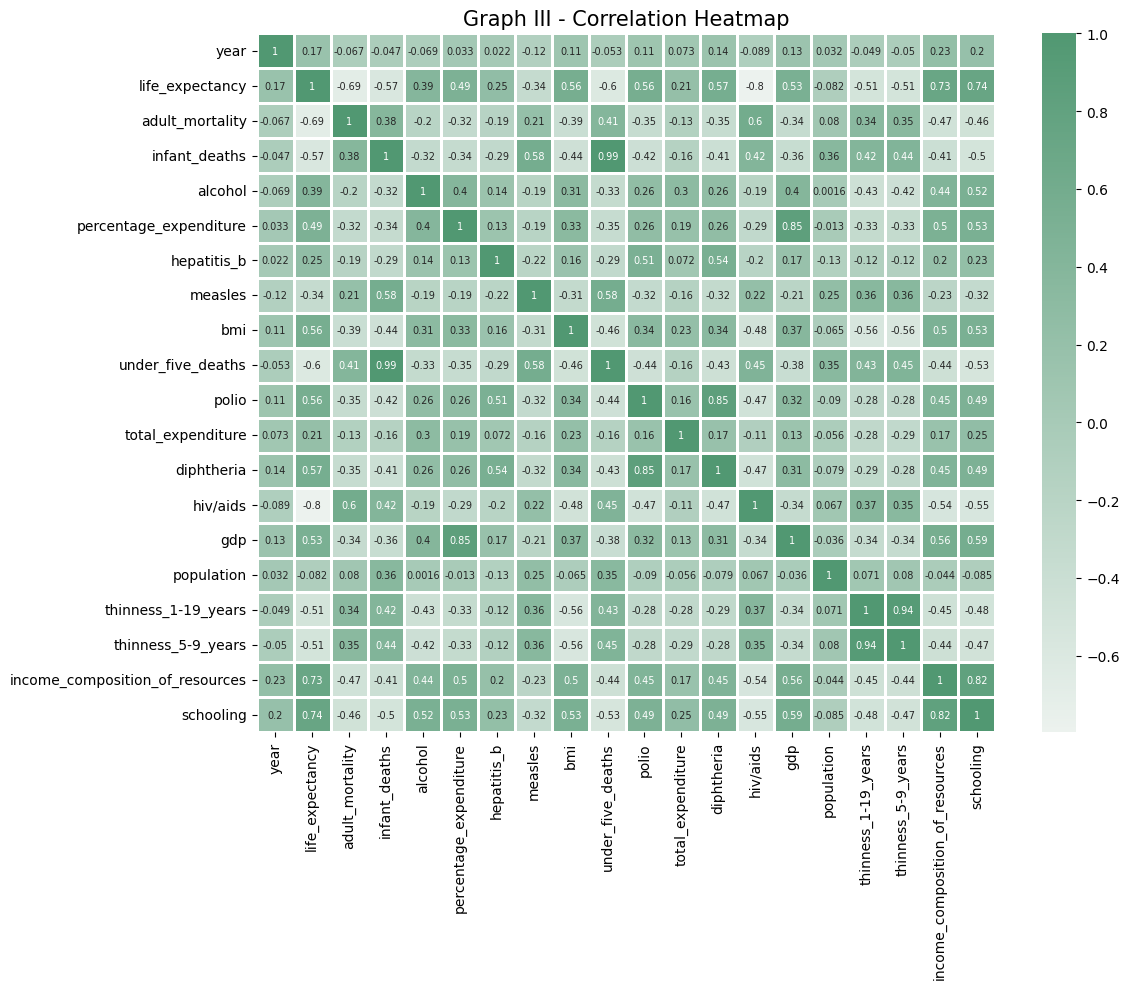

In [194]:
# calling the function defined for visuvalising correlation matrix
correlation_heatmap_for_num_cols(life_expectancy_data)

* Both "schooling" and "income_composition_of_resources" column are showing strong positive correlation with "life_expectancy". This means that higher levels of education and better resource distribution are associated with higher life expectancy

* "Adult_mortality" and "HIV/AIDS" columns have strong negative correlations with "life_expectancy". This suggests that higher rates of adult mortality and HIV/AIDS are associated with lower life expectancy

# Conclusion

* The life expetancy dataset downloaded from the kaggle is analysed here using different functions like corr() and describe(). Also three different graphs are plotted to visuvalise the data and some insights has been retrieved.